In [69]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../datasets/BankNote_Authentication.csv')

# View first few rows
print(df.head())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [70]:
import numpy as np

# Extract features and labels
X = df.drop('class', axis=1).values
y = df['class'].values

# Convert 0 to -1
y = np.where(y == 0, -1, 1)

print("Feature matrix shape:", X.shape)
print("Target label distribution:", np.unique(y, return_counts=True))


Feature matrix shape: (1372, 4)
Target label distribution: (array([-1,  1]), array([762, 610]))


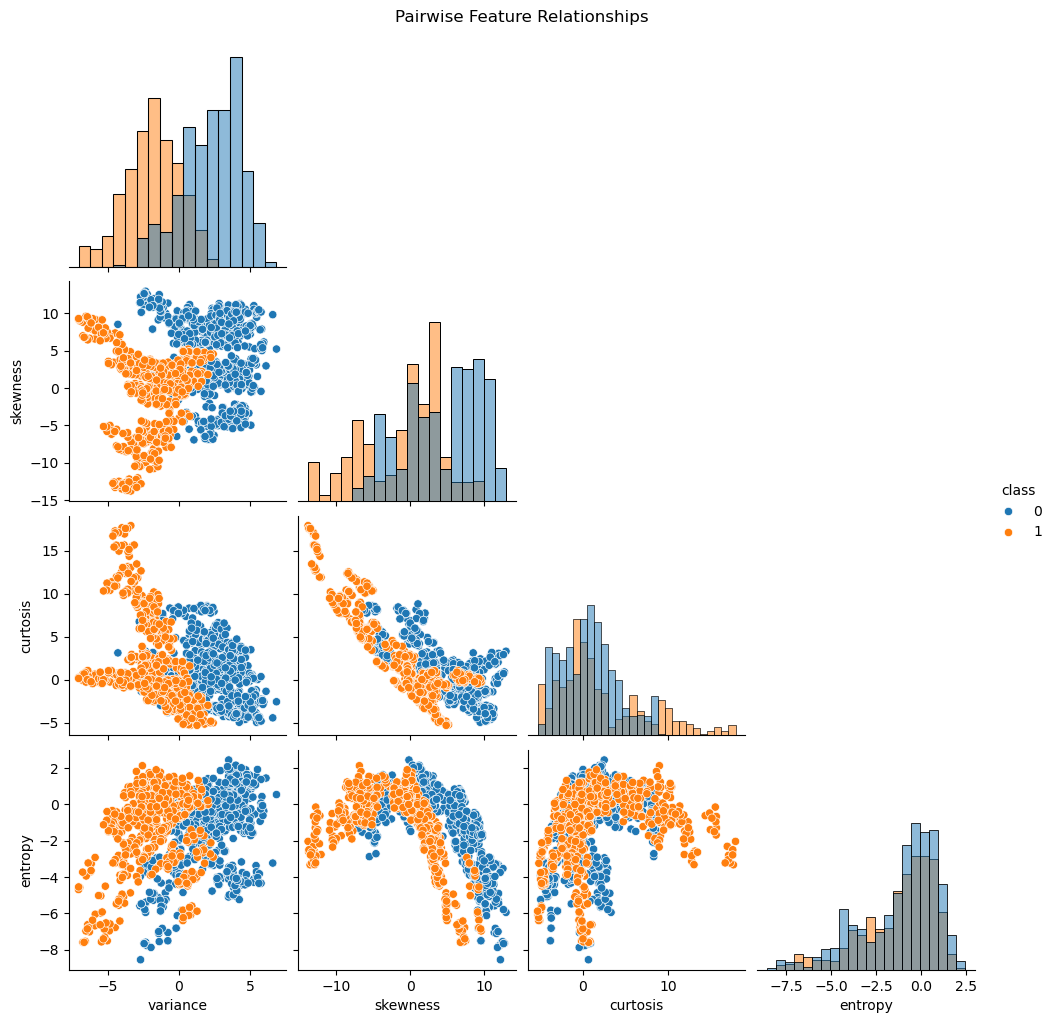

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary column for plotting (convert -1 back to 0 just for hue)
df_plot = df.copy()
df_plot['class'] = df['class'].replace({-1: 0, 1: 1})

sns.pairplot(df_plot, hue='class', diag_kind='hist', corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [72]:
# Choose two features for 2D visualization
X_vis = df[['variance', 'skewness']].values


In [73]:
import sys
import os

# Add the parent directory (project root) to the path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [74]:
from utils.scaler import StandardScaler

# Instantiate your scaler
scaler = StandardScaler()

# Fit and transform full 4D feature set for training
X_scaled = scaler.fit_transform(X)

# Create a new scaler for the 2D projection
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)



In [75]:
import importlib
import ml_algorithms.support_vector_machine
importlib.reload(ml_algorithms.support_vector_machine)
from utils.train_test_split import train_test_split_custom
from ml_algorithms.support_vector_machine import SVM
# Initialize the SVM model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_custom(X_scaled, y, test_size=0.2, random_seed=42)

# Initialize and train the model
svm = SVM(C=10, learning_rate=0.001, num_iterations=2000)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy on the test set
accuracy = np.mean(y_pred == y_test) * 100
print(f"Test accuracy: {accuracy:.2f}%")



Iteration 0: Loss = 10980.00003796675
Iteration 100: Loss = 5211.486470786964
Iteration 200: Loss = 3863.636651795539
Iteration 300: Loss = 3172.963298884335
Iteration 400: Loss = 2675.649398765818
Iteration 500: Loss = 2328.0727777859556
Iteration 600: Loss = 2098.728765892299
Iteration 700: Loss = 1940.595565369069
Iteration 800: Loss = 1840.754193417623
Iteration 900: Loss = 1773.2542381141247
Iteration 1000: Loss = 1726.2501265366818
Iteration 1100: Loss = 1691.8222519896647
Iteration 1200: Loss = 1669.5560045249047
Iteration 1300: Loss = 1656.022248175031
Iteration 1400: Loss = 1646.6805564120657
Iteration 1500: Loss = 1640.6199289549022
Iteration 1600: Loss = 1636.3013593887258
Iteration 1700: Loss = 1631.591694049548
Iteration 1800: Loss = 1627.5311608514
Iteration 1900: Loss = 1623.440916371737
Test accuracy: 98.54%
